In [3]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [5]:
df.shape

(768, 9)

In [7]:
df.size

6912

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.isna().sum().sum()

0

In [17]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [19]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2,random_state=42,shuffle=True)
X_train,y_train=train.drop(["Outcome"],axis="columns").values,train["Outcome"].values
X_test,y_test=test.drop(["Outcome"],axis="columns").values,test["Outcome"].values

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred=knn.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1- accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [27]:
print("{:.2f}".format(accuracy))
print(error_rate)
print(precision)
print(recall)

0.66
0.33766233766233766
0.5245901639344263
0.5818181818181818


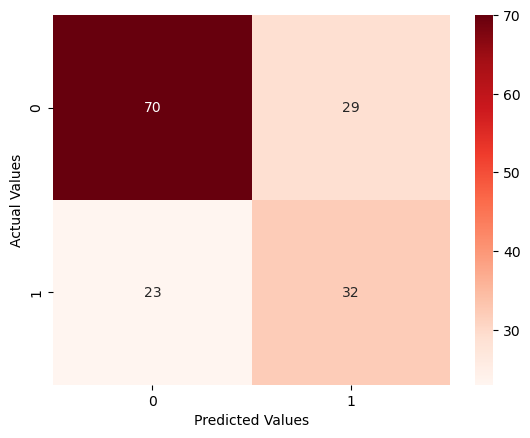

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix,annot=True,cmap="Reds")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

Text(0, 0.5, 'Glucose Level')

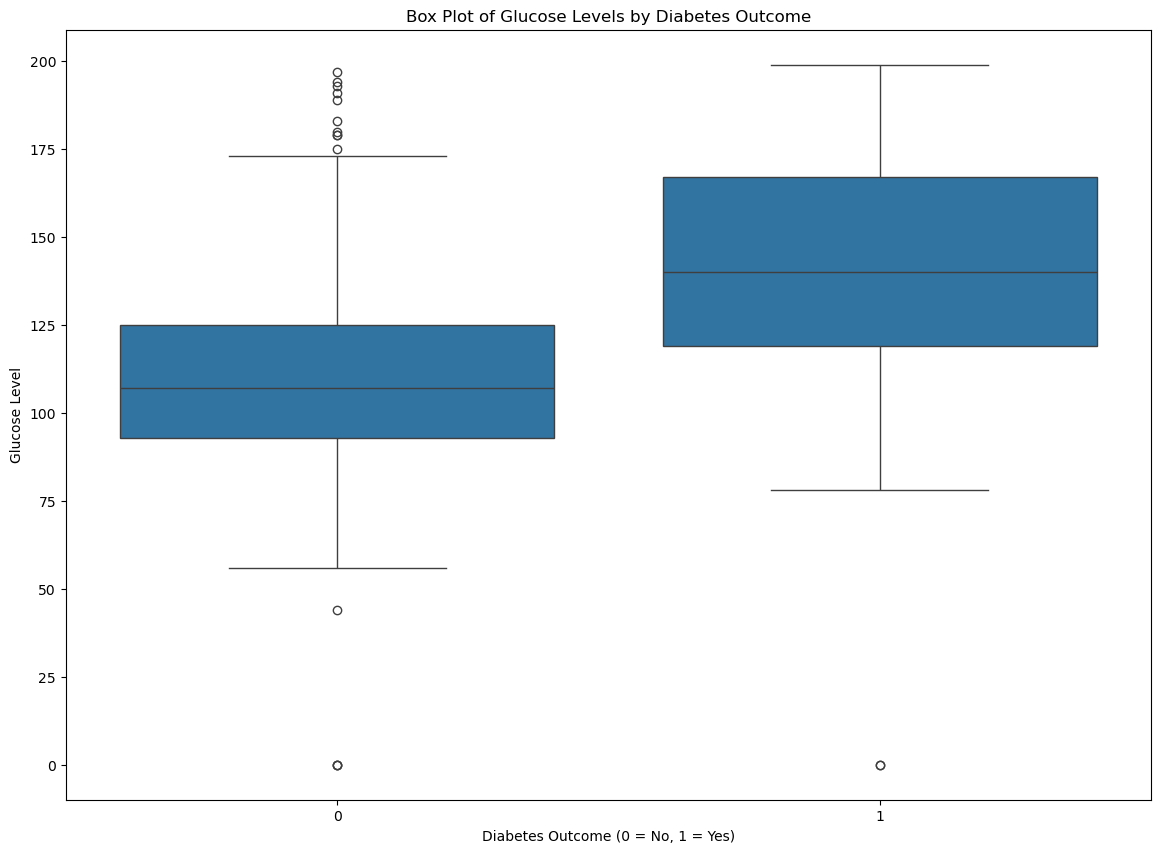

In [40]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Outcome', y='Glucose',data=df)
plt.title('Box Plot of Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level')